In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv(r"C:\Users\chris\PycharmProjects\Webscarping\arcane.csv")

In [3]:
print(f"Data shape : {df.shape}")
df.head()

Data shape : (30000, 7)


,Unnamed: 0,text,user_id,created_at,country,tweet_source,language
0,0,"Arcane actually so good,from episode 5 or 6 on...",170013094,2021-12-02 14:39:18+00:00,NaN,Twitter for Android,en
1,1,@ttvti_vi Hi! I’m an artist and would love to ...,1263817612670038016,2021-12-02 14:39:13+00:00,NaN,Twitter for iPhone,en
2,2,Family . #getjinxed #Arcane #ArcaneArt #Jinx #...,1089568928538509312,2021-12-02 14:39:02+00:00,NaN,Twitter for Android,en
3,3,@NexorrTv @vi_ishere @selfcestenjoyer @twhiddl...,1353903104295632896,2021-12-02 14:38:52+00:00,NaN,Twitter Web App,en
4,4,@shadowlessbard ohh don't worry hehehe i trans...,1264118739479474178,2021-12-02 14:38:51+00:00,NaN,Twitter for Android,en


In [4]:
df.columns

Index(['Unnamed: 0', 'text', 'user_id', 'created_at', 'country',
       'tweet_source', 'language'],
      dtype='object')

In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          30000 non-null  object
 1   user_id       30000 non-null  int64 
 2   created_at    30000 non-null  object
 3   country       186 non-null    object
 4   tweet_source  30000 non-null  object
 5   language      30000 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(df)

,text,user_id,created_at,country,tweet_source,language
Total,0,0,0,29814,0,0
Percent,0.0,0.0,0.0,99.38,0.0,0.0
Types,object,int64,object,object,object,object


In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(df)

,text,user_id,created_at,country,tweet_source,language
Total,30000,30000,30000,186,30000,30000
Uniques,29819,20978,25488,159,257,1


In [11]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(df)

,text,user_id,created_at,country,tweet_source,language
Total,30000,30000,30000,186,30000,30000
Most frequent item,@NetflixFR Arcane,1287644632449343488,2021-12-01 13:00:03+00:00,{'place_id': '3b77caf94bfc81fe'},Twitter for iPhone,en
Frequence,19,124,10,4,10133,30000
Percent from total,0.063,0.413,0.033,2.151,33.777,100.0


In [13]:
# stopwords = set(STOPWORDS)

# def show_wordcloud(data, title = None):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         max_words=50,
#         max_font_size=40, 
#         scale=5,
#         random_state=1
#     ).generate(str(data))

#     fig = plt.figure(1, figsize=(10,10))
#     plt.axis('off')
#     if title: 
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)

#     plt.imshow(wordcloud)
#     plt.show()

In [14]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

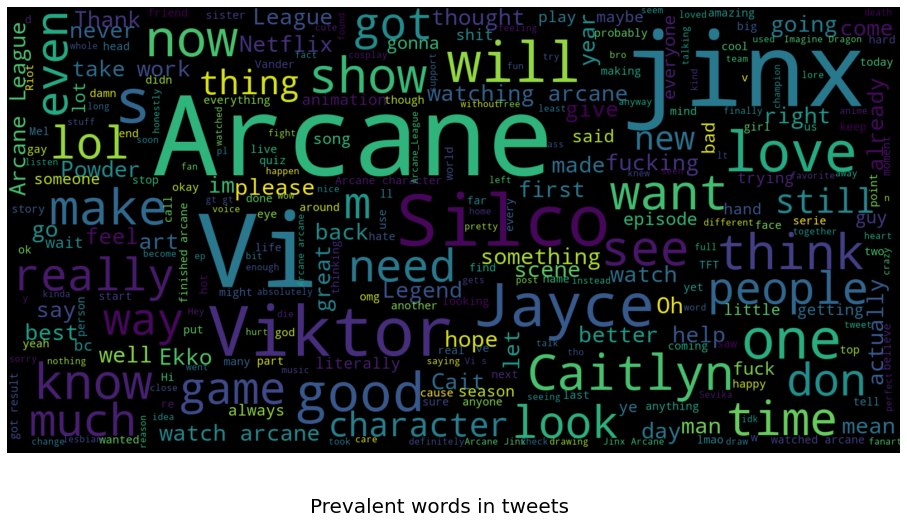

In [15]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

# Extract Date and time features

In [17]:
# Extract Date and time features

df['date_tweet'] = pd.to_datetime(df['created_at'])

In [18]:
df['year'] = df['date_tweet'].dt.year
df['month'] = df['date_tweet'].dt.month
df['day'] = df['date_tweet'].dt.day
df['dayofweek'] = df['date_tweet'].dt.dayofweek
df['hour'] = df['date_tweet'].dt.hour
df['minute'] = df['date_tweet'].dt.minute
df['dayofyear'] = df['date_tweet'].dt.dayofyear
df['date_only'] = df['date_tweet'].dt.date

In [19]:
df_agg = df.groupby(["date_only"])["text"].count().reset_index()
df_agg.columns = ["date_only", "count"]

In [20]:
df_agg

,date_only,count
0,2021-12-01,15523
1,2021-12-02,14477


In [21]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

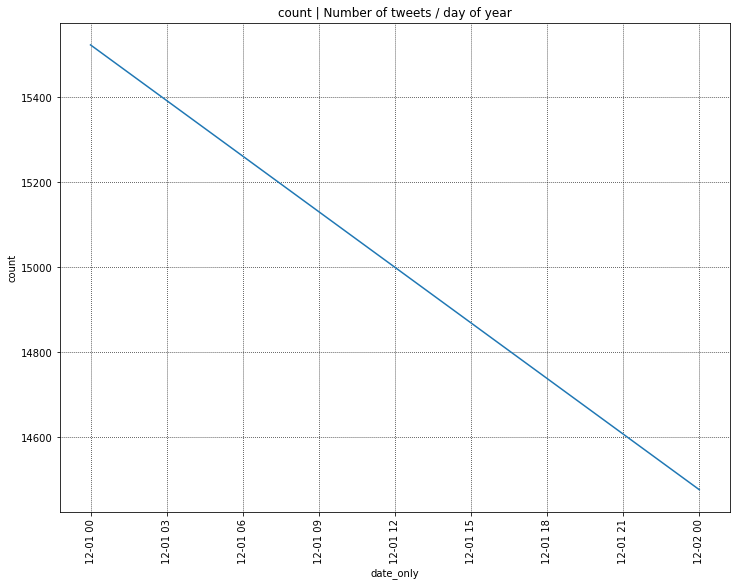

In [22]:
plot_time_variation(df_agg, title="Number of tweets / day of year",size=3)

In [23]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

C:\Users\chris\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


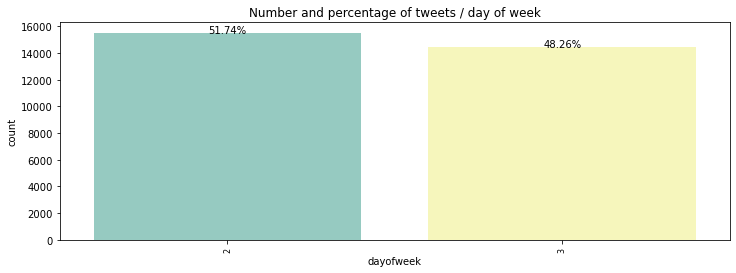

In [24]:
plot_count("dayofweek", "tweets / day of week", df, size=3, ordered=False)

C:\Users\chris\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


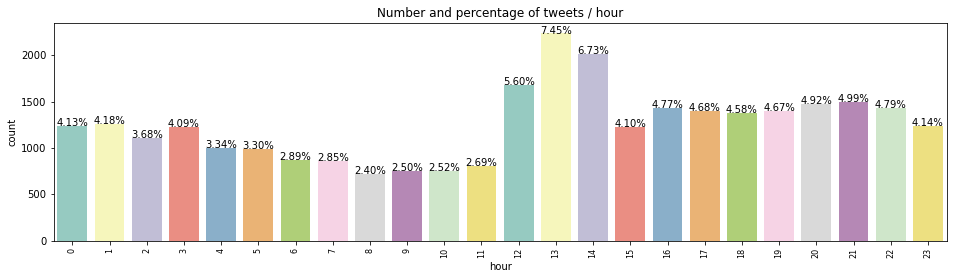

In [25]:
# Hour visualization
plot_count("hour", "tweets / hour", df,size=4, ordered=False)

C:\Users\chris\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


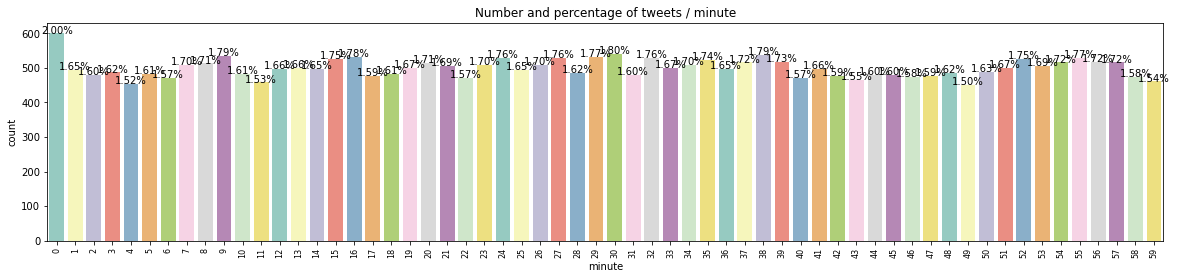

In [26]:
# Min visualization
plot_count("minute", "tweets / minute", df,size=5, ordered=False)

# SENTIMENT ANALYSIS

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [29]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

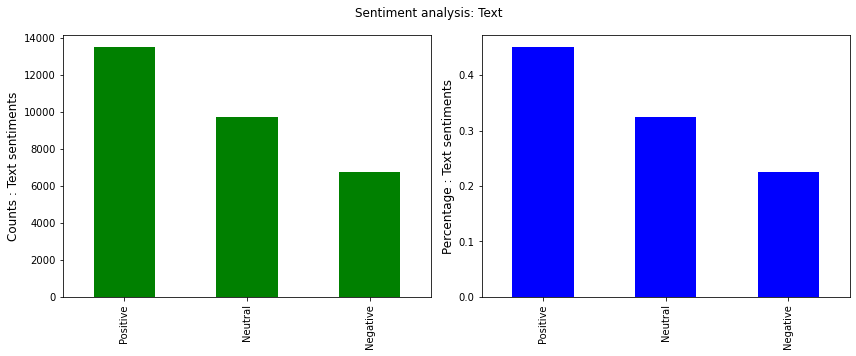

In [30]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

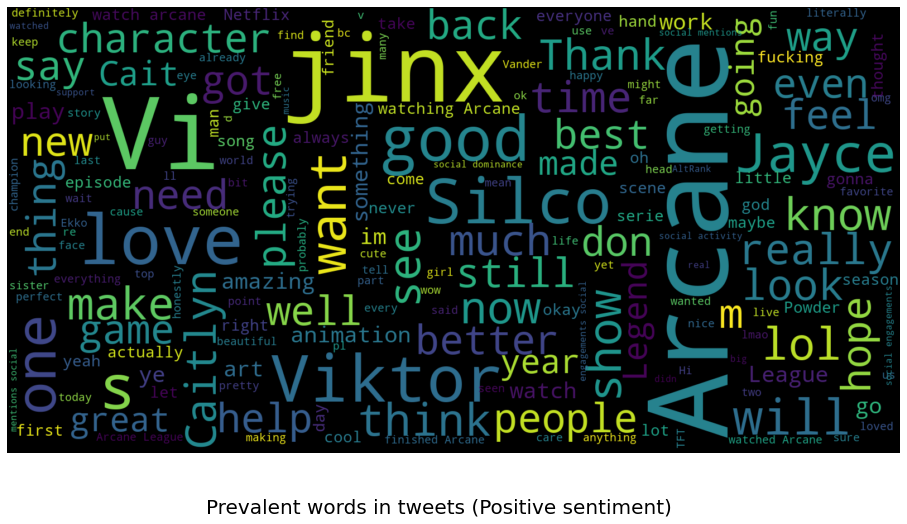

In [31]:
show_wordcloud(df.loc[df['sentiment']=='Positive', 'text'], title = 'Prevalent words in tweets (Positive sentiment)')

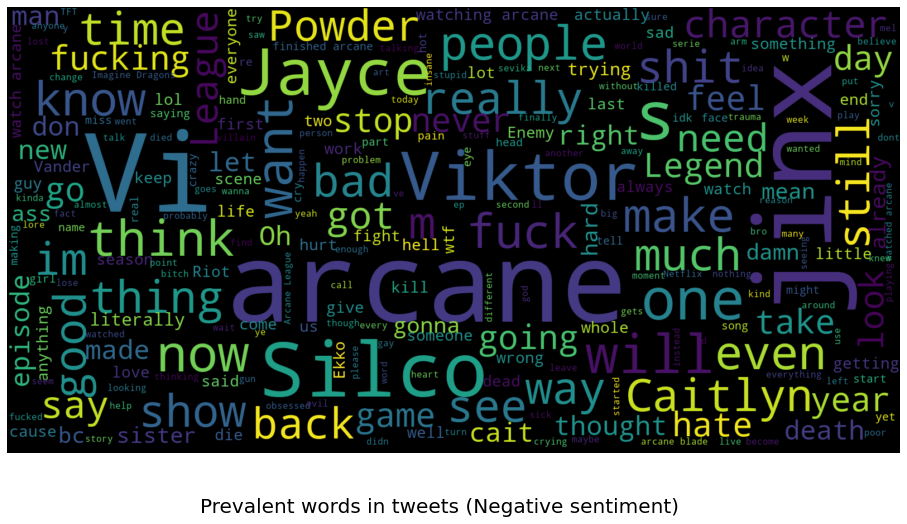

In [32]:
show_wordcloud(df.loc[df['sentiment']=='Negative', 'text'], title = 'Prevalent words in tweets (Negative sentiment)')

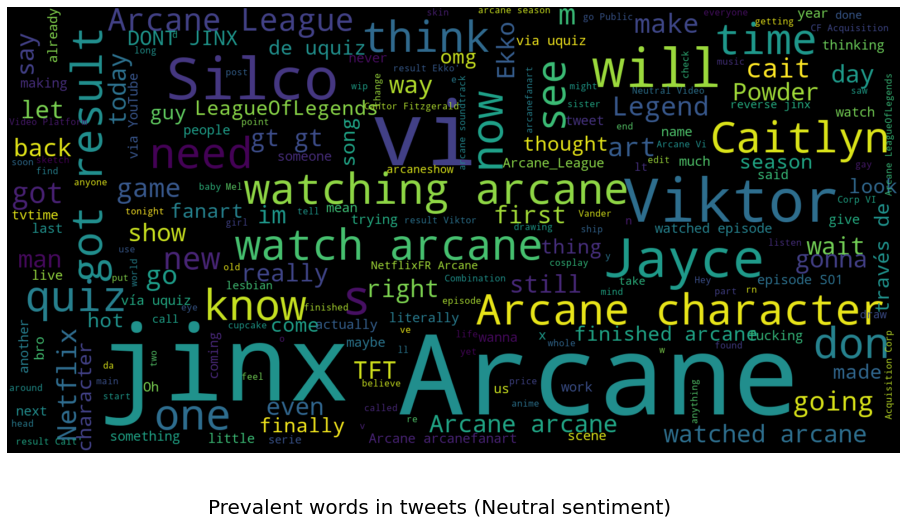

In [33]:
show_wordcloud(df.loc[df['sentiment']=='Neutral', 'text'], title = 'Prevalent words in tweets (Neutral sentiment)')

# Zoom On Tweet Source

In [34]:
df['tweet_source'].value_counts()

Twitter for iPhone          10133
Twitter for Android          9620
Twitter Web App              7695
Twitter for iPad              487
TweetDeck                     244
                            ...  
Amplifr                         1
News Bot 101                    1
GameSpace.com                   1
Spinitron Playlists             1
Test App - MicahDanSmith        1
Name: tweet_source, Length: 257, dtype: int64

<AxesSubplot:>

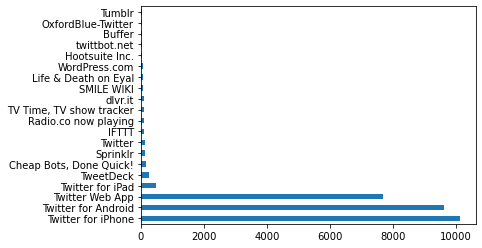

In [43]:
# Tweet Source Analysis
df['tweet_source'].value_counts()[:20].plot(kind='barh')